In [2]:
from neuralprophet import NeuralProphet
import pandas as pd
from utilities import *

In [3]:
date_col = 'Time'
predicted_col = 'day_close'
train_percentage = 1
add_regressors_to_prophet = True
shift_length = 3 # Only affects ML models
save_prediction_prophet = True # Starts predicting t=len(training_set)

In [4]:
df = load_data()

In [16]:
ndf = df[['Time', 'day_close']]
ndf= ndf.rename(columns={'Time':'ds','day_close':'y'})
ndf

,ds,y
0,2010-08-17 00:00:00+00:00,0.070000
1,2010-08-18 00:00:00+00:00,0.068000
2,2010-08-19 00:00:00+00:00,0.066700
3,2010-08-20 00:00:00+00:00,0.065500
4,2010-08-21 00:00:00+00:00,0.066400
...,...,...
4092,2021-10-30 00:00:00+00:00,61735.370670
4093,2021-10-31 00:00:00+00:00,61366.999882
4094,2021-11-01 00:00:00+00:00,61058.226265
4095,2021-11-02 00:00:00+00:00,63176.571785


In [28]:
nds = ndf['ds'].dt.tz_localize(None)
frames = [nds,ndf['y']]
adf = pd.concat(frames, axis = 1)
adf

,ds,y
0,2010-08-17,0.070000
1,2010-08-18,0.068000
2,2010-08-19,0.066700
3,2010-08-20,0.065500
4,2010-08-21,0.066400
...,...,...
4092,2021-10-30,61735.370670
4093,2021-10-31,61366.999882
4094,2021-11-01,61058.226265
4095,2021-11-02,63176.571785


In [38]:
m = NeuralProphet(
    n_forecasts=1,
    n_lags=7,
    num_hidden_layers=2,
    n_changepoints=100,
    trend_reg=2,
    seasonality_mode='multiplicative',
    
)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.


In [39]:
metrics = m.fit(adf, freq="D")
forecast = m.predict(adf)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 127


  0%|          | 0/280 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.16E+00, min: 1.45E-01


  0%|          | 0/280 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.44E-02, min: 1.45E-01


  0%|          | 0/280 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.44E-02, min: 1.25E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.84E-02
Epoch[127/127]: 100%|██████████| 127/127 [00:27<00:00,  4.70it/s, SmoothL1Loss=0.00427, MAE=1.94e+3, RMSE=3.4e+3, RegLoss=0.0768] 


In [40]:
forecast = m.predict(adf)

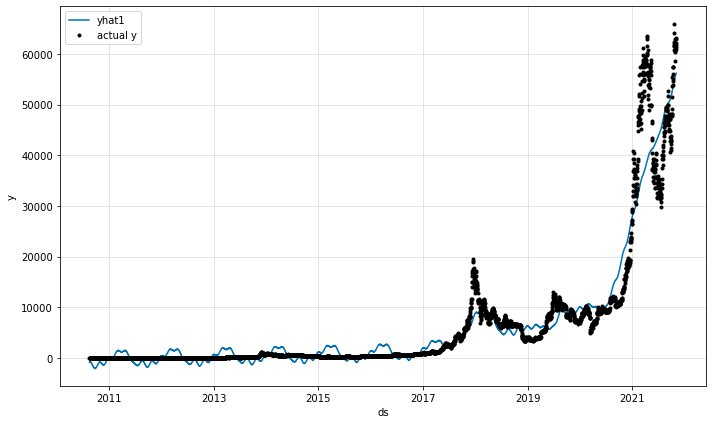

In [41]:
forecasts_plot = m.plot(forecast)

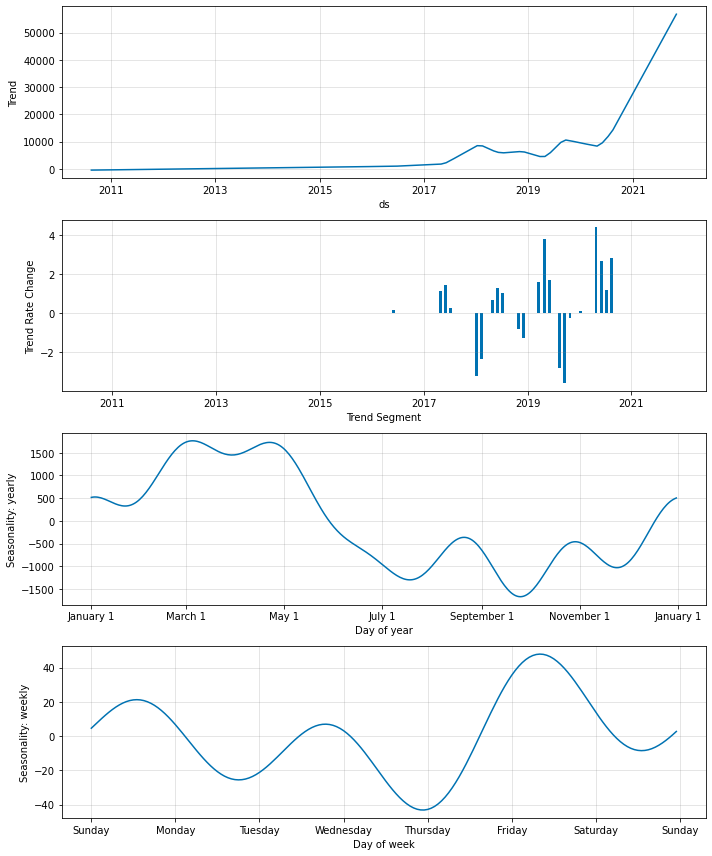

In [42]:
fig_param = m.plot_parameters()

In [48]:
m.highlight_nth_step_ahead_of_each_forecast(step_number=1)